In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipympl
from mpl_toolkits.mplot3d import Axes3D

In [17]:
%matplotlib inline
#%matplotlib notebook

In [18]:
A = np.array([3., 6., 9.])
B = np.array([ 6., 4., 2.])
C = np.array([ 3., 3., 3.])

orig_object = [A, B, C]

xaxis = np.array([1., 0., 0.])
yaxis = np.array([0., 1., 0.])
zaxis = np.array([0., 0., 1.])
I = np.array([[1., 0., 0.], [0., 1., 0.], [0., 0., 1.]])

Define the following matrix from the axis vector $\vec{v}$: $$ v_{cross} =
\begin{bmatrix}
0 & -v_z & v_y\\
v_z & 0 & -v_x\\
-v_y & v_x & 0
\end{bmatrix}$$

In [19]:
def v_cross(v):
    return np.array([[0.,-v[2],v[1]],[v[2],0.,-v[0]],[-v[1],v[0],0.]])

Rodrigues' formula for the rotation matrix: $$ R = I + (\sin{\theta})v_{cross} + (1-\cos{\theta})v_{cross}^2$$

In [20]:
theta = np.pi / 4
R_x = I + np.sin(theta)* v_cross(xaxis) + (1-np.cos(theta))*np.matmul(v_cross(xaxis), v_cross(xaxis))

In [21]:
A_r = np.matmul(R_x, A)
B_r = np.matmul(R_x, B)
C_r = np.matmul(R_x, C)

rotated_object = [A_r, B_r, C_r]

In [22]:
def plot_3D(orig_object, rotated_object):

    fig = plt.figure(figsize=[5, 5])
    ax = fig.add_subplot(1, 1, 1, projection='3d')

    for i, p in enumerate(orig_object):
        ax.scatter(p[0], p[1], p[2], label='original', s=40, c='k')
        ax.text(p[0], p[1], p[2],  '%s' % (str(i)), size=10, zorder=1,
                color='k')

    for i, r in enumerate(rotated_object):
        ax.scatter(r[0], r[1], r[2], label='rotated', s=40, c='g')
        ax.text(r[0], r[1], r[2],  '%s' % (str(i)), size=10, zorder=1,
                color='k')


    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')


    plt.show()

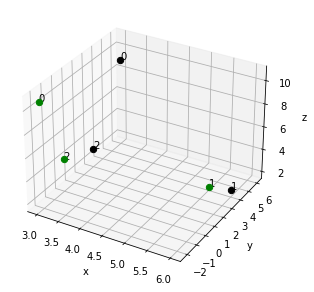

In [23]:
plot_3D(orig_object, rotated_object)

In [24]:
theta2 = 2*np.pi/3
R_y = I + np.sin(theta2)* v_cross(yaxis) + (1-np.cos(theta2))*np.matmul(v_cross(yaxis), v_cross(yaxis))

In [25]:
A_r2 = np.matmul(R_y, A_r)
B_r2 = np.matmul(R_y, B_r)
C_r2 = np.matmul(R_y, C_r)

rotated_object2 = [A_r2, B_r2, C_r2]

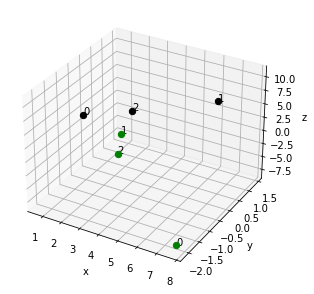

In [26]:
plot_3D(rotated_object, rotated_object2)

In [27]:
print(rotated_object2)

[array([ 7.68558654, -2.12132034, -7.90137707]), array([ 0.67423461,  1.41421356, -7.31747277]), array([ 2.17423461e+00,  4.44089210e-16, -4.71939655e+00])]


In [28]:
final_object = []

for c in rotated_object2:
    c =  c - 3 * zaxis
    final_object.append(c)

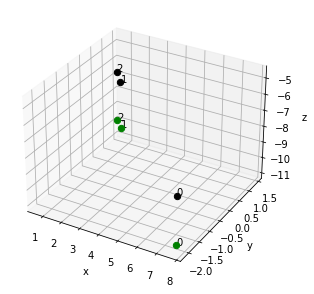

In [29]:
plot_3D(rotated_object2, final_object)

In [30]:
print(final_object)

[array([  7.68558654,  -2.12132034, -10.90137707]), array([  0.67423461,   1.41421356, -10.31747277]), array([ 2.17423461e+00,  4.44089210e-16, -7.71939655e+00])]
